In [1]:
from BR import best_respond, total_cost
from plot import plot_strategies_instantaneous

In [2]:
def find_equilibrium(Va, Vb, ainitial, binitial, T, kappa, lower_limit, upper_limit, max_iter=50, print_iter=False):
    """
    Best response dynamics. Finds (pure) Nash equilibrium if converges.

    Args:
        Va (int): Target volume for player A
        Vb (int): Target volume for player B 
        ainitial (array-like): Initial trading schedule for player A
        binitial (array-like): Initial trading schedule for player B
        T (int): Number of time steps
        kappa (float): Market impact parameter
        lower_limit (int): Lower limit of shares that can be bought at each step
        upper_limit (int): Upper limit of shares that can be bought at each step
        max_iter (int, optional): Maximum number of iterations. Defaults to 50.
        print_iter (bool, optional): Whether to print iteration details. Defaults to False.

    Returns:
        (if converges) tuple:
            - a (array): Equilibrium trading schedule for player A 
            - b (array): Equilibrium trading schedule for player B
    """

    a = ainitial
    b = binitial

    for iteration in range(max_iter):
        if print_iter:
            print(f"iteration: {iteration} =================================")

        # track whether any strategy was updated
        updated = False

        a_BR = best_respond(Va, b, T, kappa, lower_limit, upper_limit) # A's best response to B's current strategy
        if total_cost(a_BR, b, kappa) != total_cost(a, b, kappa): # only update strategy if cost changes (avoids tiebreaking issues)
            if print_iter:
                print(f"A updated: a'_{iteration} = BR(b'_{iteration-1})")
            a = a_BR
            updated = True
        else:
            if print_iter:
                print("A did not update")

        cA = total_cost(a, b, kappa) # A's cost after update
        cB = total_cost(b, a, kappa) # B's cost after update
        if print_iter:
            print(f"costs: {cA}, {cB}")

        b_BR = best_respond(Vb, a, T, kappa, lower_limit, upper_limit) # B's best response to A's updated strategy
        if total_cost(b_BR, a, kappa) != total_cost(b, a, kappa): # only update strategy if cost changes (avoids tiebreaking issues)
            if print_iter:
                print(f"B updated: b'_{iteration} = BR(a'_{iteration})")
            b = b_BR
            updated = True
        else:
            if print_iter:
                print("B did not update")

        cA = total_cost(a, b, kappa) # A's cost after update
        cB = total_cost(b, a, kappa) # B's cost after update
        if print_iter:
            print(f"costs: {cA}, {cB}")

        # plot strategies
        if print_iter:
            print(f"plotting: a'_{iteration} = BR(b'_{iteration-1}), b'_{iteration} = BR(a'_{iteration})")
            plot_strategies_instantaneous(a, b)

        # converged if no updates occurred
        if updated == False:
            if print_iter:
                print("converged")
            return a, b # return equilibrium pair

    # return current strategies if not converged after max_iter iterations
    print("reached maximum iterations without convergence")
    return a, b 

### Example of BR Dynamics

iteration: 0 =================================
A updated: a'_0 = BR(b'_-1)
costs: 233.0, 314.0
B updated: b'_0 = BR(a'_0)
costs: 285.0, 302.5
plotting: a'_0 = BR(b'_-1), b'_0 = BR(a'_0)


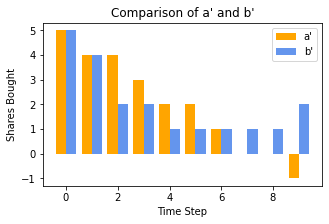

iteration: 1 =================================
A updated: a'_1 = BR(b'_0)
costs: 279.5, 278.0
B updated: b'_1 = BR(a'_1)
costs: 285.5, 275.0
plotting: a'_1 = BR(b'_0), b'_1 = BR(a'_1)


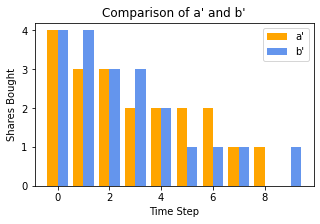

iteration: 2 =================================
A updated: a'_2 = BR(b'_1)
costs: 284.5, 282.0
B updated: b'_2 = BR(a'_2)
costs: 280.5, 281.5
plotting: a'_2 = BR(b'_1), b'_2 = BR(a'_2)


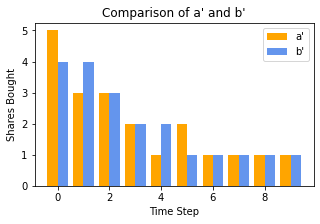

iteration: 3 =================================
A updated: a'_3 = BR(b'_2)
costs: 280.0, 285.0
B did not update
costs: 280.0, 285.0
plotting: a'_3 = BR(b'_2), b'_3 = BR(a'_3)


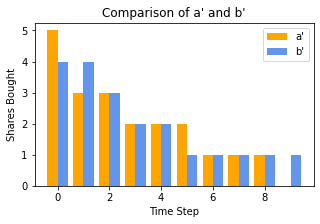

iteration: 4 =================================
A did not update
costs: 280.0, 285.0
B did not update
costs: 280.0, 285.0
plotting: a'_4 = BR(b'_3), b'_4 = BR(a'_4)


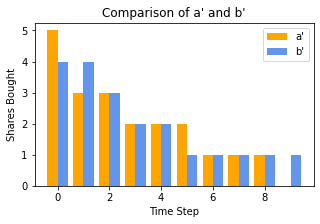

converged


In [3]:
# initialize parameters
Va = 20  # shares to buy for A
Vb = 20  # shares to buy for B
T = 10   # number of time steps
lower_limit = -20
upper_limit = 20

kappa = 0.5 # relative multiplier on permanent impact

# initialize uniform strategies
anow = [Va/T] * T
bnow = [Vb/T] * T

# run best response dynamics
a, b = find_equilibrium(Va, Vb, anow, bnow, T, kappa, lower_limit, upper_limit, max_iter=50, print_iter=True)